# Lead Score - Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals
who are interested in the courses land on their website and browse for courses. The company markets its courses on several
websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a
form for the course or watch some videos. When these people fill up a form providing their email address or phone number,
they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired,
employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted
while most do not. The typical lead conversion rate at X education is around 30%.

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying
customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that
the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a
lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [176]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [177]:
# Reading the data 
df=pd.read_csv("leads.csv")

In [178]:
# checking the shape of the data 
df.shape

(9240, 37)

In [179]:
# checking few lines of data 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [180]:
#  checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [181]:
# checking the stats value of data 
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [182]:
#  listing out all the avilable coloumns 
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [183]:
#  inspecting the data set for null values 
null_values=df.isnull().sum()/len(df)*100
(null_values)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [184]:
#  dropping the columns who's null values are greater than 30
null_values = (null_values[null_values > 40]).index.to_list()
df.drop(columns=null_values, inplace=True)

In [185]:
# new shape after dropping null values >30
df.shape

(9240, 32)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [187]:
# lets impute the non null values again
null_values = df.isnull().sum() / len(df) * 100
(null_values)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [188]:
# List of the columns having null values
null_values = null_values[null_values > 0]
null_values = null_values.index.to_list()
null_values

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [189]:
# imputing null values for the data
for col in null_values:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [15]:
# Checking final null values in each column
df.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [190]:
df.shape

(9240, 32)

In [191]:
#  acc. to the data dict we don't need these procespect id and Lead number
df.drop(columns=["Prospect ID", "Lead Number"], inplace=True)

In [192]:
#  let's check the shape 
df.shape

(9240, 30)

In [193]:
#  let's check the coloumn values and data types 
for i in df:
    print(df[i].value_counts())
    print("*"*100)
 

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
****************************************************************************************************
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
****************************************************************************************************
Do Not Email
No 

In [194]:
mode_value_spec = df["Specialization"].mode()[0]
mode_value_lead = df["Lead Profile"].mode()[0]
mode_value_how = df["How did you hear about X Education"].mode()[0]
print(mode_value_spec, mode_value_lead, mode_value_how)

Select Select Select


We've identified the presence of the 'Select' value in the columns [Specialization, Lead Profile, How did you hear about X Education]. Given that these values offer no meaningful information for our analysis, we've determined that they should be discarded. It's evident that 'Select' is the mode value in these columns, indicating a high frequency of occurrence.

Considering the dataset dictionary, we recognize that these columns do not provide significant insights into the leads. Therefore, removing them from our analysis streamlines our data processing pipeline and ensures a more focused exploration of relevant features for lead conversion prediction.

In [195]:
df.drop(
    ["City", "Lead Profile", "How did you hear about X Education", "Specialization"],
    axis=1,
    inplace=True,
)

# EDA


In [196]:
cat_cols =df.select_dtypes(include="object").columns.tolist()
num_cols =df.select_dtypes(include=["int64","float64"]).columns.tolist()


In [197]:
cat_cols,num_cols

(['Lead Origin',
  'Lead Source',
  'Do Not Email',
  'Do Not Call',
  'Last Activity',
  'Country',
  'What is your current occupation',
  'What matters most to you in choosing a course',
  'Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Tags',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'],
 ['Converted',
  'TotalVisits',
  'Total Time Spent on Website',
  'Page Views Per Visit'])

In [198]:
# let's find out the target valriable values
df["Converted"].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

### Corelation matrix


<Axes: >

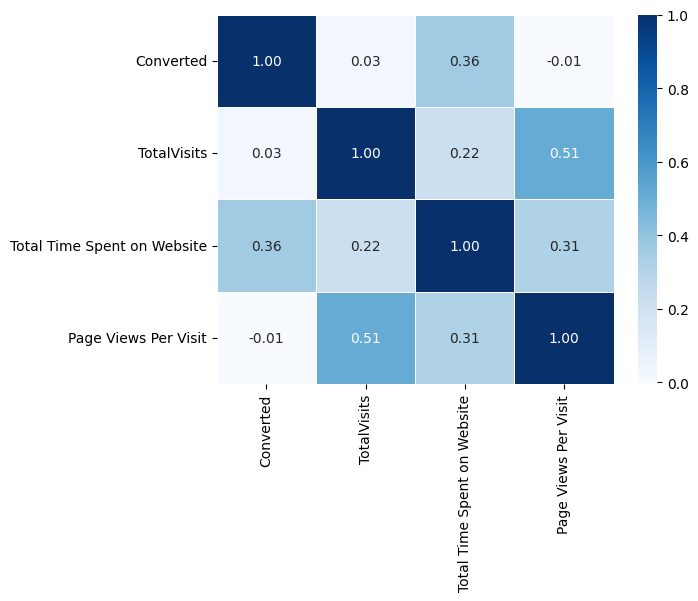

In [25]:
sns.heatmap(
    data=df[num_cols].corr(), cmap="Blues", annot=True, fmt=".2f", linewidths=0.5
)


The correlation coefficients between different variables. In this case, the variables are:



* There is a strong positive correlation (0.6) between Total Visits and Total Time Spent on Website. This means that websites with more visitors tend to have users who spend more time on the site.
* There is a moderate positive correlation (0.51) between Total Visits and Page Views per Visit. This means that websites with more visitors tend to have users who view more pages per visit.
* There is a weak positive correlation (0.36) between Converted and Total Time Spent on Website. This means that there is a slight positive correlation between the number of conversions and the amount of time users spend on the website.

 


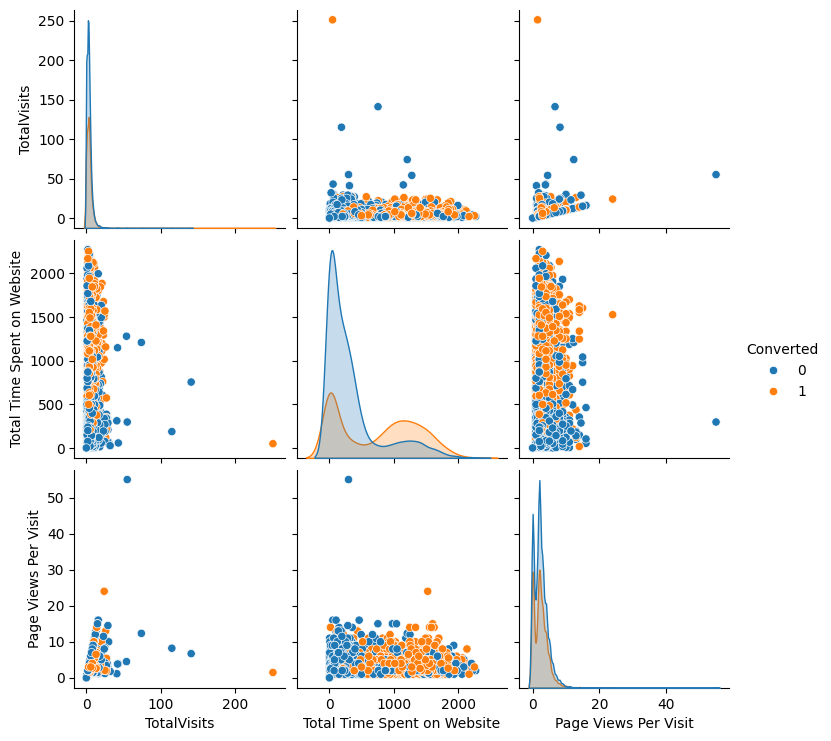

In [199]:
sns.pairplot(data=df, diag_kind="kde", hue="Converted")
plt.show()



* **Total Visits and Total Time Spent on Website:** There's a strong positive correlation (0.60) between these two metrics, indicating that websites with higher visitor counts tend to have users who spend more time browsing the site. This could be because these websites offer engaging content that keeps users interested, or they might be structured in a way that encourages users to explore multiple pages.

* **Total Visits and Page Views per Visit:** A moderate positive correlation (0.51) exists between these metrics. This suggests that websites with more visitors also tend to have users who view more pages per visit. This could be due to several factors, such as a well-designed website navigation that makes it easy for users to find what they're looking for, or content that is well-linked, encouraging users to explore related topics. 

* **Converted and Total Time Spent on Website:** There's a weak positive correlation (0.36) between these two metrics. This means that there's a slight tendency for websites with higher conversion rates to have users who spend more time on the site. However, the correlation is weak, so it's important to consider other factors that might influence conversions.



* **Type of website:** The nature of the website could influence these metrics. For instance, e-commerce websites might see a stronger correlation between total visits and conversions compared to informational websites.
* **Marketing channels:** How visitors arrive at the website might influence their browsing behavior. For example, users referred by social media might exhibit different patterns compared to those who arrive through search engines.
* **Content type:** The kind of content offered on the website could play a role. Websites with engaging video content might see a stronger correlation between total visits and total time spent on the website compared to text-heavy websites.



In [201]:
def check_outliers(data, columnList):
    plt.figure(figsize=[16, 10])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    for i, column in enumerate(columnList, start=1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=data[column], color="skyblue")  # Adjust boxplot color if needed
        plt.title(column, fontsize=14, color="brown")
        plt.xlabel("")  # Remove x-axis label for better clarity
        plt.ylabel(
            column, fontsize=12, color="grey"
        )  # Set y-axis label with column name

    plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="green")
    plt.show()

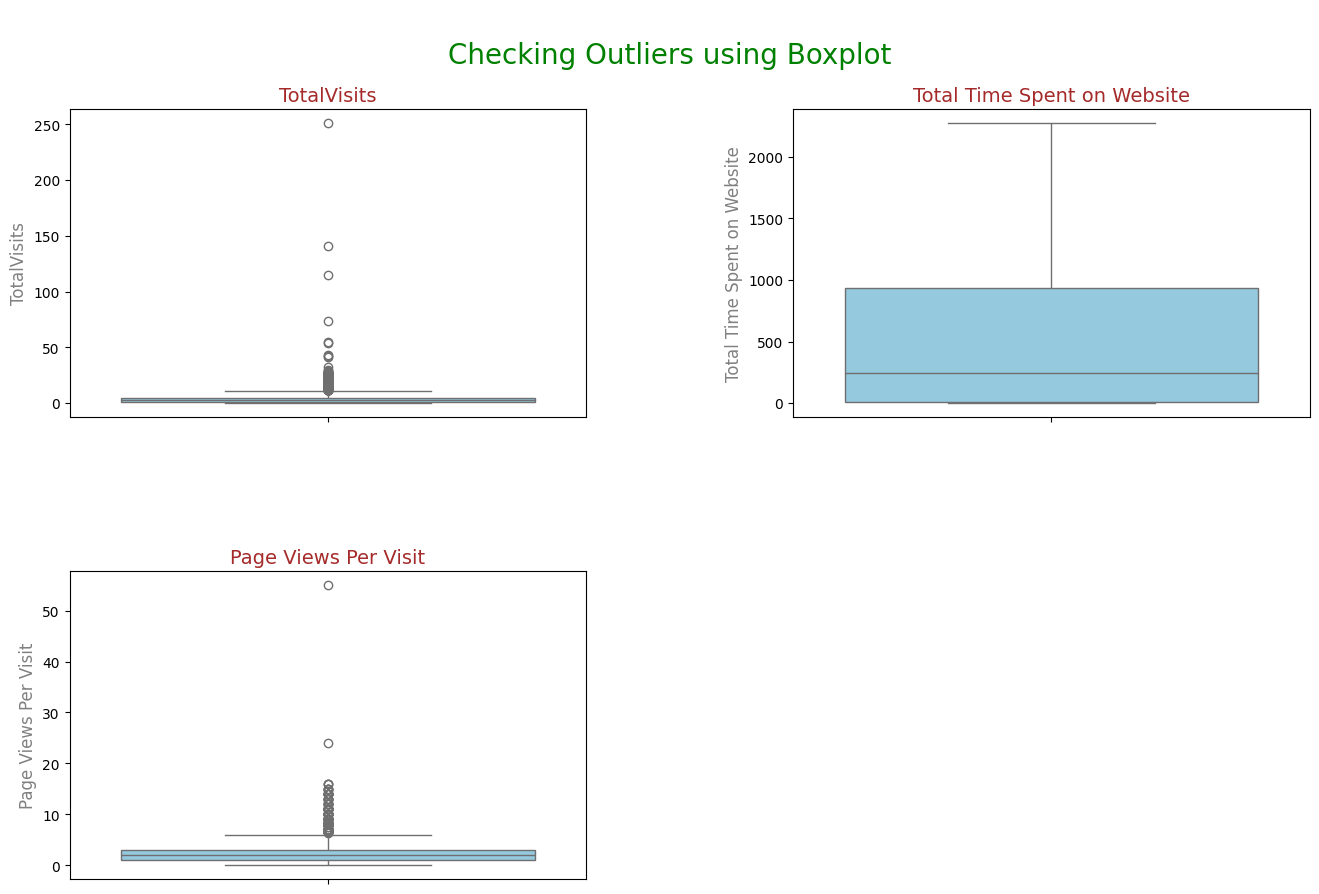

In [28]:
check_outliers(df, num_cols[1:])



* The median total time spent checking outliers is substantially higher than the median total visits. The line in the middle of the box represents the median, which is the middle value in the data set after it’s been ordered.  In this case, the line for total time spent checking outliers is higher than the line for total visits, which means that half the data points fall above that line and half fall below.
* The spread of data for total time spent checking outliers is larger than the spread of data for total visits. The box in the plot represents the interquartile range (IQR), which is the range that contains the middle 50% of the data. The IQR for total time spent checking outliers is larger than the IQR for total visits, which means the data points for total time spent checking outliers are more spread out than the data points for total visits. 
* There may be outliers in the data for total time spent checking outliers. Outliers are data points that fall outside the 1.5 IQR range. The circles at the top and bottom of the whiskers in the plot represent outliers. There appear to be more outliers for total time spent checking outliers than total visits. 


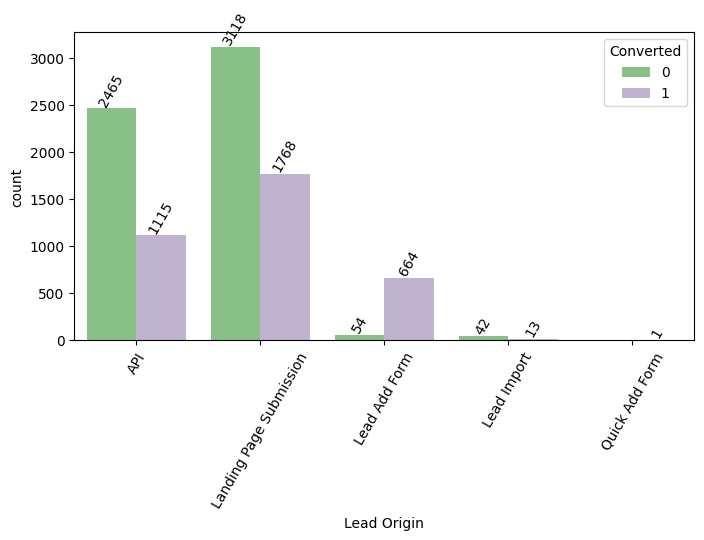

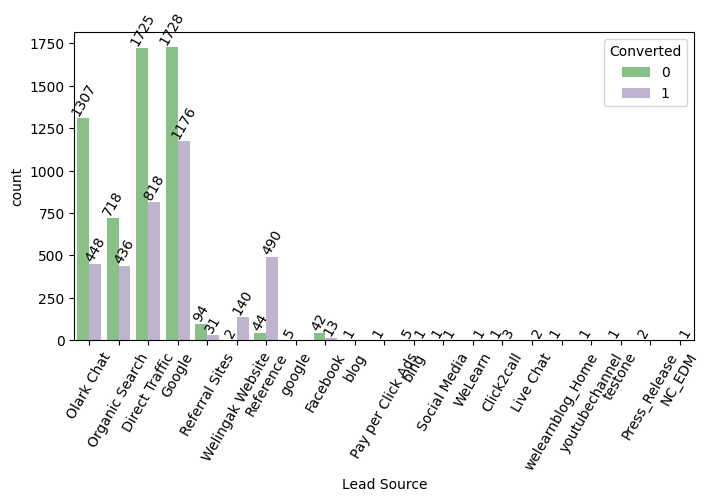

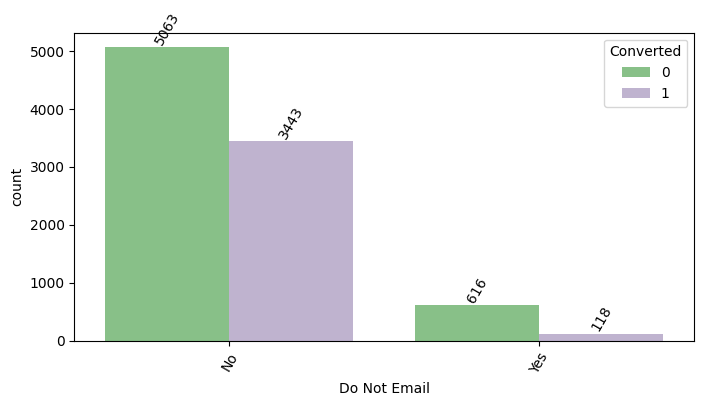

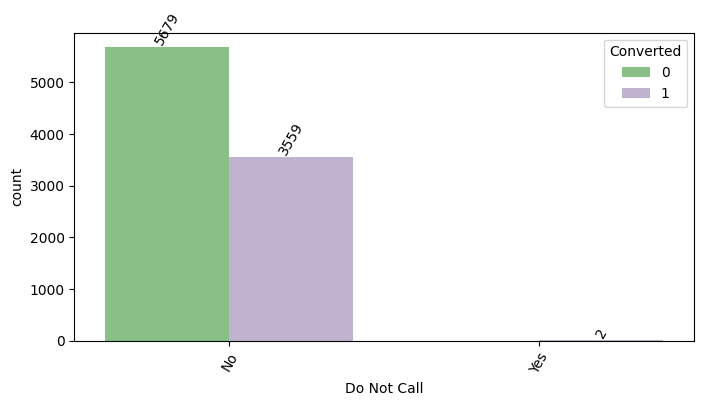

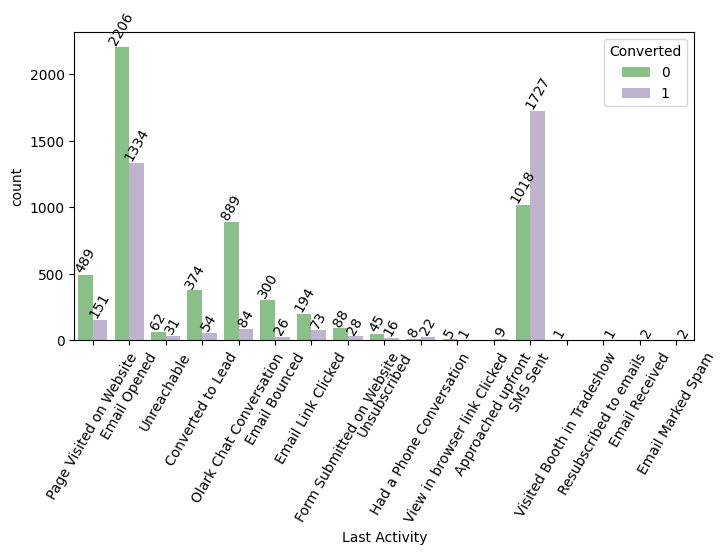

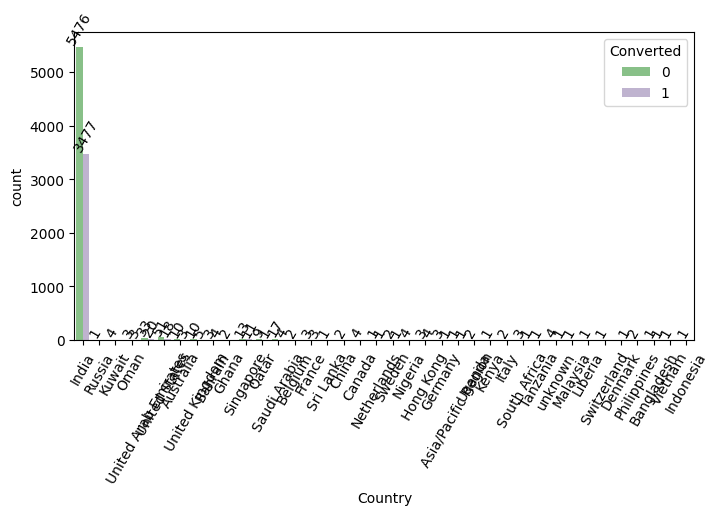

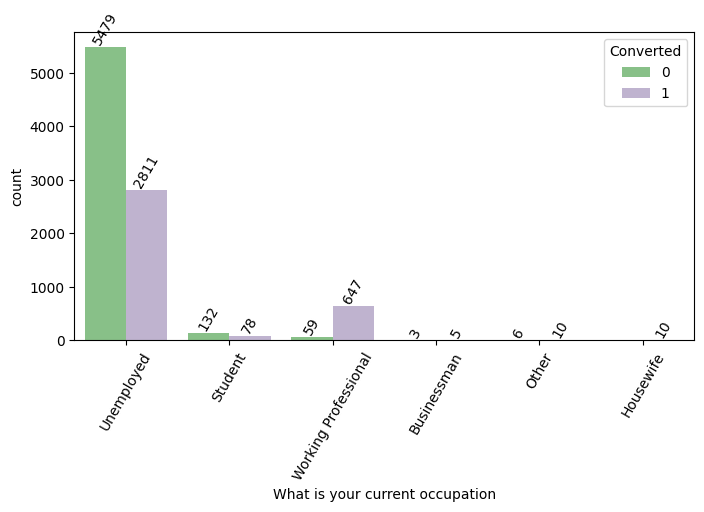

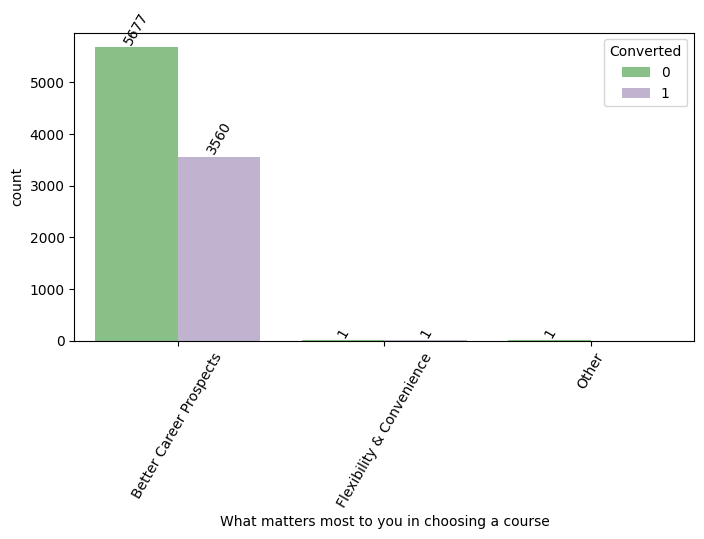

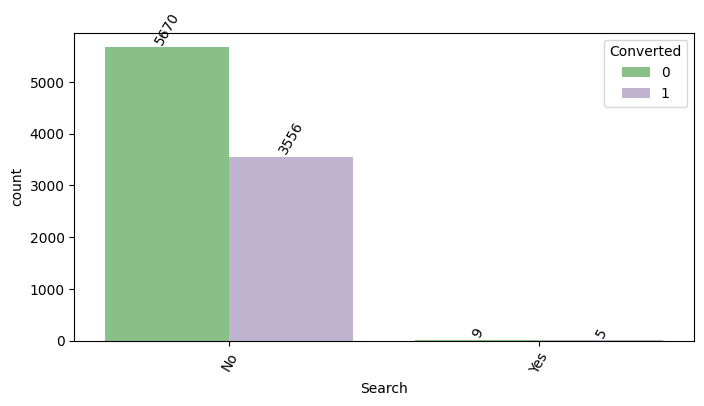

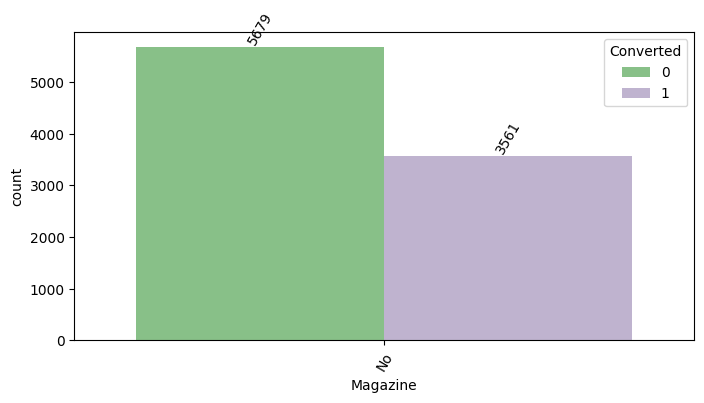

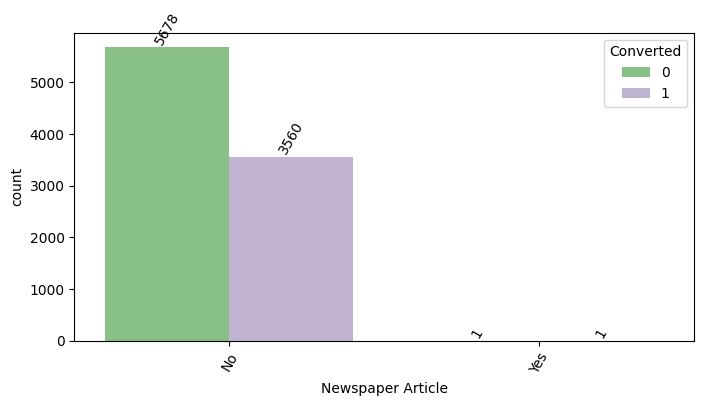

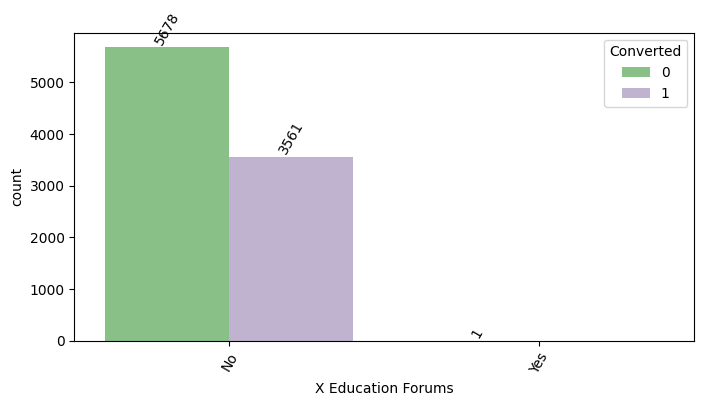

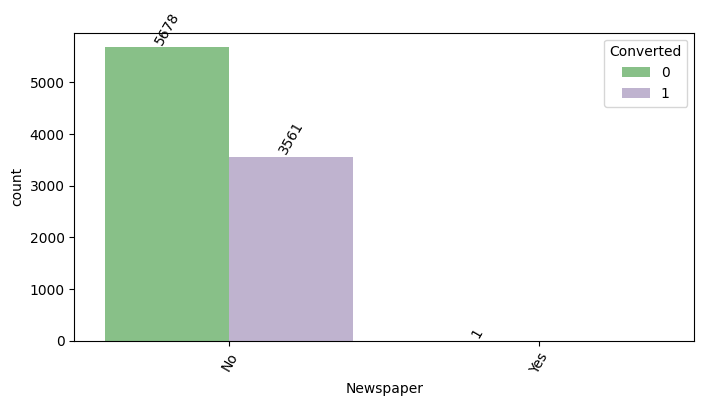

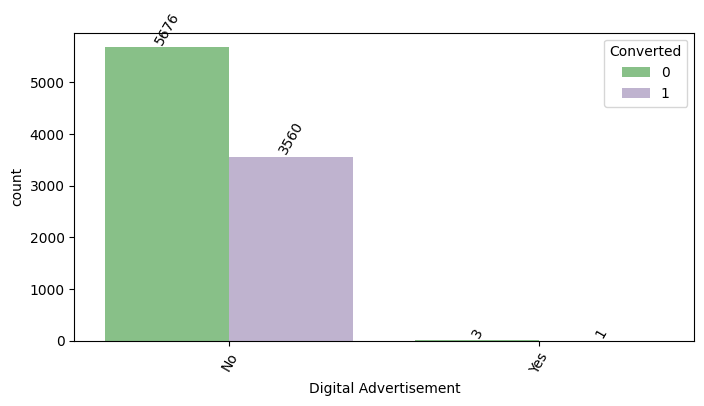

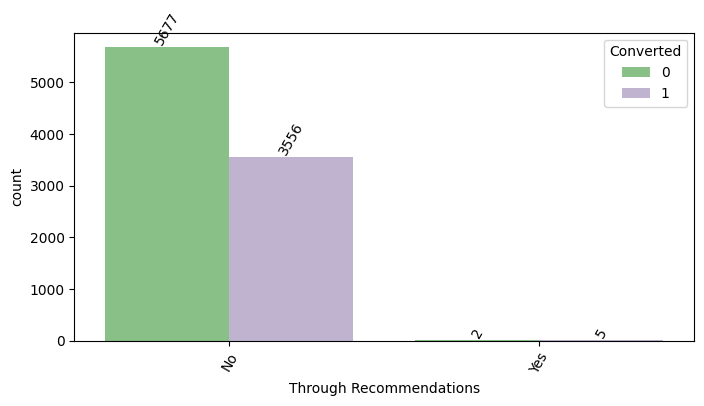

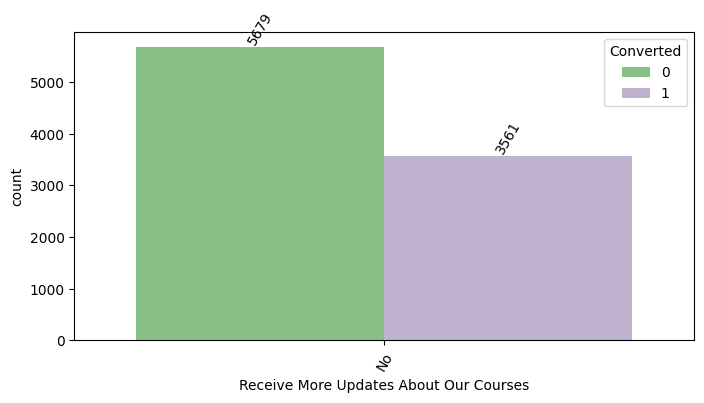

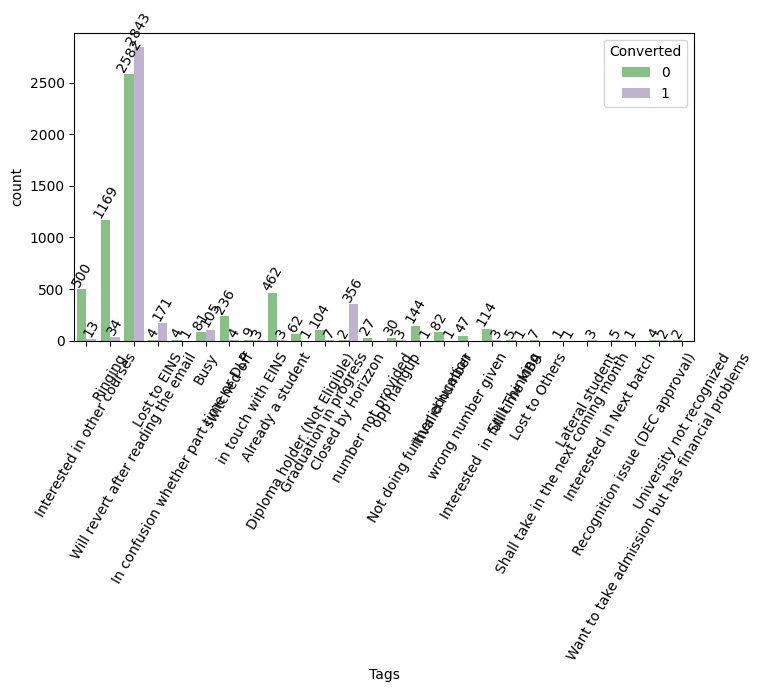

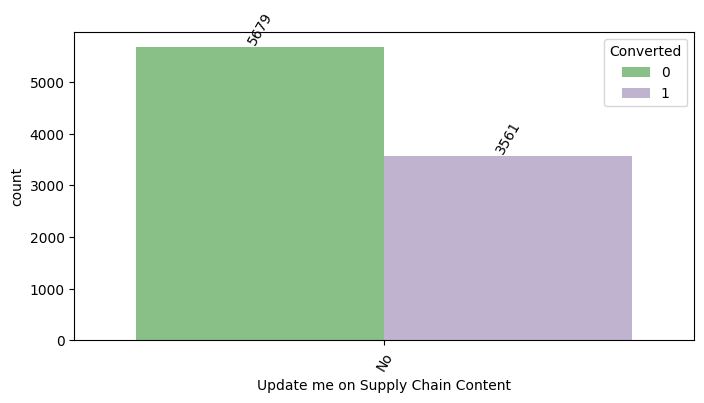

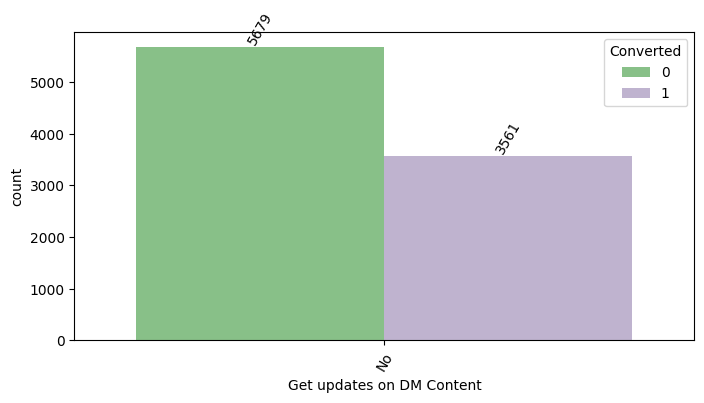

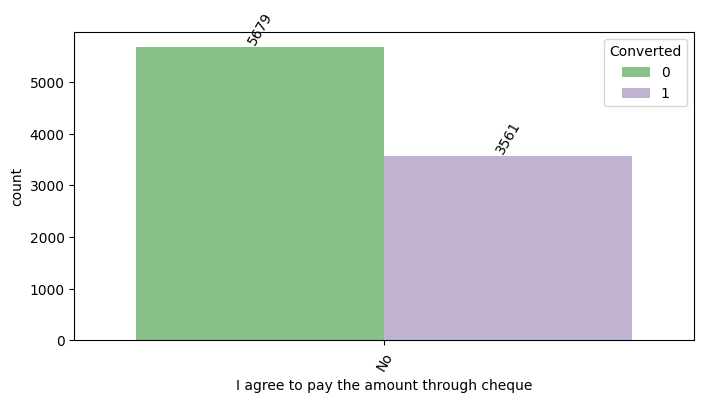

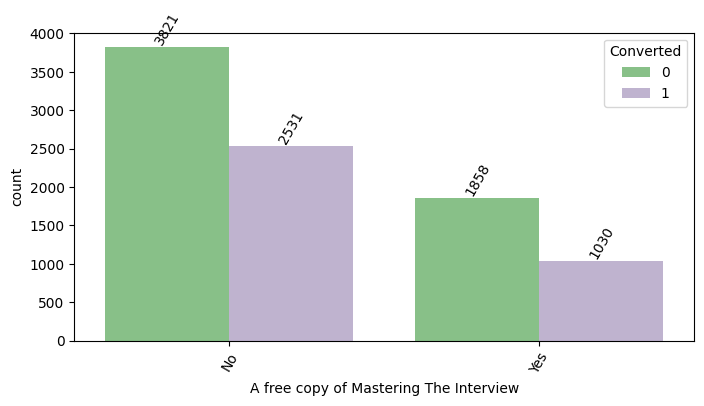

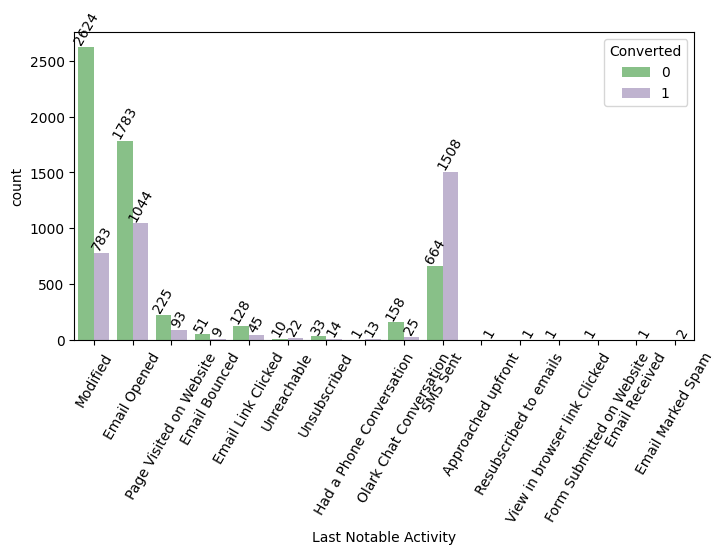

In [202]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df, x=col, palette="Accent", hue=df.Converted
    )
    for x in ax.containers:
        ax.bar_label(x, rotation=60)
    plt.xticks(rotation=60)
    plt.show()

Inference drawn from the categorical features:

- **Lead Origin:** Leads originating from 'API' and 'Landing Page Submission' are more likely to be converted.
  
- **Lead Source:** 'Google' and 'Direct Traffic' are the primary sources of leads, followed by 'Reference', 'Olark Chat', and 'Organic Search'.

- **Do Not Email:** Leads who opt not to receive emails are more prevalent in the dataset compared to those who opt to receive emails.

- **Do Not Call:** Leads who prefer not to be called are more prevalent, but interestingly, those who are open to calls have a higher conversion rate.

- **Last Activity:** The most common last activity is 'Email Opened', followed by 'SMS Sent'. Both activities show potential for conversion.

- **Country:** The majority of leads are from 'India', but no significant inference can be drawn from this variable.

- **What is your current occupation:** Working professionals show a higher likelihood of joining the course, while unemployed leads are the most abundant, though with a moderate conversion rate.

- **What matters most to you in choosing a course:** 'Better Career Prospects' is the predominant choice, but it doesn't provide significant insights into lead conversion.

- **Other Parameters (Search, Newspaper Article, Newspaper, X Education Forums, Digital Advertisement, Through Recommendations):** These parameters do not offer meaningful insights into lead conversion due to their predominantly negative responses.

- **Tags:** Leads tagged as 'Will revert after reading the email' show the highest conversion rate.

- **A Free Copy of Mastering the Interview:** Leads declining a free copy are more prevalent among conversions.

- **Last Notable Activity:** Activities such as 'Email Opened' and 'SMS Sent' are more frequent among converted leads.

Overall, these insights help in understanding the characteristics of leads that are more likely to convert, enabling targeted strategies to improve lead conversion rates.

Based on the categorical analysis, we have determined that the features 'Search', 'Newspaper', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement', and 'Through Recommendations' do not provide meaningful insights for lead conversion prediction. Therefore, we recommend dropping these features from the dataset.

Additionally, considering that X Education is an online platform and the majority of leads are from India, the 'Country' feature may not contribute significantly to lead conversion prediction. However, it's worth noting that India represents a significant portion of the dataset.

Therefore, we propose dropping the aforementioned irrelevant features and acknowledging the predominance of leads from India. This streamlined dataset will focus on more relevant factors for lead conversion prediction.

In [203]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [204]:
df.drop(
    [
        "Newspaper Article",
        "Newspaper",
        "Through Recommendations",
        "Digital Advertisement",
        "Search",
        "Country",
    ],
    axis=1,
    inplace=True,
)

In [205]:
# UPDATING CAT COLUMNS
cat_cols = [
    "Lead Origin",
    "Lead Source",
    "Do Not Email",
    "Do Not Call",
    "Last Activity",
    "What is your current occupation",
    "What matters most to you in choosing a course",
    "X Education Forums",
    "Tags",
    "A free copy of Mastering The Interview",
    "Last Notable Activity",
]

## Data Prepration for model building

In [206]:
leads_data = pd.get_dummies(data=df, columns=cat_cols, drop_first=True,dtype="int")

In [207]:
leads_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,No,No,No,No,No,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,No,No,No,No,No,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,No,No,No,No,No,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,No,No,No,No,No,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,No,No,No,No,No,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,No,No,No,No,No,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,No,No,No,No,No,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,No,No,No,No,No,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,No,No,No,No,No,1,...,0,0,0,0,0,0,1,0,0,0


In [208]:
cols = leads_data.columns.to_list()
for col in cols:
    if leads_data[col].dtype == "bool":
        leads_data[col] = leads_data[col].astype("uint8")

In [209]:

leads_data.columns.to_list()

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Do Not Email_Yes',
 'Do Not Call_Yes',
 'Last Activity_Converted to

In [210]:
# Importing important libraries required in predictive model building.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
leads_data.shape

(9240, 100)

In [38]:
leads_data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Magazine',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtube

## SPLITTING THE DATA

In [213]:
y = leads_data["Converted"]
x = leads_data.drop("Converted", axis=1)

In [214]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=100
)

In [215]:
# Shape of Train and Test data sets after split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 99)
(2772, 99)
(6468,)
(2772,)


## SCALING THE DATA

In [216]:
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [217]:
x_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do

In [218]:
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

In [219]:
# Let us scale continuous variables and Fit and transform training set only
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.656434,-0.885371,-1.085519,No,No,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.100767,0.005716,-0.470569,No,No,No,No,No,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.290067,-0.691418,0.070401,No,No,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.290067,1.365219,1.226321,No,No,No,No,No,1,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.656434,-0.885371,-1.085519,No,No,No,No,No,0,0,...,0,0,1,0,0,0,0,0,0,0


In [220]:
x_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,3.295653e-17,-6.701161e-17,-1.428116e-17,0.528139,0.079468,0.005102,0.000155,0.271490,0.005102,0.320037,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.444763,0.071252,0.466527,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,-6.564336e-01,-8.853708e-01,-1.085519e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-4.671335e-01,-8.634138e-01,-6.231508e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-8.853323e-02,-4.352528e-01,-1.607829e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.900670e-01,8.098906e-01,3.015850e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,4.685790e+01,3.271816e+00,2.434472e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## MODEL BUILDING

In [221]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [222]:
cols = leads_data.columns.to_list()
for col in cols:
    if leads_data[col].dtype == "bool":
        leads_data[col] = leads_data[col].astype("uint8")

In [223]:
x_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do

In [225]:
for col in x_train.columns:
    x_train[col] = x_train[col].replace({"Yes": 1, "No": 0})

In [226]:
# Import RFE and select 20 variables
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)  # running RFE with 20 variables as output
rfe = rfe.fit(x_train, y_train)

In [58]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Magazine', False, 53),
 ('Receive More Updates About Our Courses', False, 52),
 ('Update me on Supply Chain Content', False, 51),
 ('Get updates on DM Content', False, 50),
 ('I agree to pay the amount through cheque', False, 49),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', F

In [227]:
# VIF Function definition of getting compatibility of the features in RFE model
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    vif_data = x_train[cols]
    vif_values = [
        variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])
    ]
    vif_df = pd.DataFrame({"Features": cols, "VIF": vif_values})
    vif_df["VIF"] = round(vif_df["VIF"], 2)
    vif_df = vif_df.sort_values(by="VIF", ascending=False)
    print(vif_df)

In [228]:
# Creating list of columns selected for RFE model building process
# Print Columns selected by RFE. We will manually eliminate for these columns
x_train_rfe = x_train.columns[rfe.support_].tolist()
print(x_train_rfe)

['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch', 'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']


In [229]:
x_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do

# Model 1

In [230]:
# Selected columns for Model 1 - all columns selected by RFE
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Diploma holder (Not Eligible)",
    "Tags_Interested in Next batch",
    "Tags_Lateral student",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_invalid number",
    "Tags_switched off",
    "Tags_wrong number given",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1801.0
Date:                Mon, 15 Apr 2024   Deviance:                       3602.0
Time:                        22:38:18   Pearson chi2:                 1.12e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5381
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# model 2

Drop "Tags_Lateral student"due to High P-Score

Do Not Call_Yes Last Notable Activity_Form Submitted on Website dropping these two due to high p value

In [231]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Diploma holder (Not Eligible)",
    "Tags_Interested in Next batch",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_invalid number",
    "Tags_switched off",
    "Tags_wrong number given",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1810.6
Date:                Mon, 15 Apr 2024   Deviance:                       3621.2
Time:                        22:49:20   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5367
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Model 3
Drop 'Tags_Interested in Next batch' due to High P-Score

In [232]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Diploma holder (Not Eligible)",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_invalid number",
    "Tags_switched off",
    "Tags_wrong number given",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1814.7
Date:                Mon, 15 Apr 2024   Deviance:                       3629.4
Time:                        22:49:40   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5362
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 4
Drop "Tags_Diploma holder (Not Eligible) " due to High P-Score

In [233]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_invalid number",
    "Tags_switched off",
    "Tags_wrong number given",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1816.7
Date:                Mon, 15 Apr 2024   Deviance:                       3633.4
Time:                        22:50:19   Pearson chi2:                 1.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5359
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 5
Drop " Tags_wrong number given " due to High P-Score

In [235]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_invalid number",
    "Tags_switched off",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1818.9
Date:                Mon, 15 Apr 2024   Deviance:                       3637.8
Time:                        22:50:44   Pearson chi2:                 1.14e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5356
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 6
Drop "  Tags_invalid number    " due to High P-Score

In [236]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Unemployed",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_switched off",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.8
Date:                Mon, 15 Apr 2024   Deviance:                       3641.6
Time:                        22:51:04   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5353
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 7
Drop "What is your current occupation_Unemployed " due to High VIF

In [237]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Lead Source_Welingak Website",
    "Do Not Email_Yes",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_switched off",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1829.4
Date:                Mon, 15 Apr 2024   Deviance:                       3658.8
Time:                        22:51:36   Pearson chi2:                 1.14e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5341
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 8
Drop "Lead Source_Welingak Website " due to High P-Score

In [238]:
rfe_cols = [
    "Total Time Spent on Website",
    "Lead Origin_Lead Add Form",
    "Do Not Email_Yes",
    "What is your current occupation_Working Professional",
    "Tags_Busy",
    "Tags_Closed by Horizzon",
    "Tags_Lost to EINS",
    "Tags_Ringing",
    "Tags_Will revert after reading the email",
    "Tags_in touch with EINS",
    "Tags_switched off",
    "Last Notable Activity_Had a Phone Conversation",
    "Last Notable Activity_SMS Sent",
]
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1832.0
Date:                Mon, 15 Apr 2024   Deviance:                       3664.1
Time:                        22:51:51   Pearson chi2:                 1.18e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5337
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Model Evaluation
Now that both the p-values and VIFs appear to be satisfactory for all variables, we can proceed with making predictions using this finalized set of features.

In [239]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1871    0.001306
6795    0.314681
3516    0.001599
8105    0.162413
3934    0.153545
4844    0.998561
3297    0.001536
8071    0.999960
987     0.461872
7423    0.980674
dtype: float64

In [240]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00130638, 0.3146814 , 0.00159858, 0.16241253, 0.15354532,
       0.99856129, 0.00153592, 0.99996008, 0.46187222, 0.98067402])

In [241]:
y_train_pred_final = pd.DataFrame(
    {"Converted": y_train.values, "Converted_prob": y_train_pred}
)
y_train_pred_final["Prospect ID"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.001306,1871
1,0,0.314681,6795
2,0,0.001599,3516
3,0,0.162413,8105
4,0,0.153545,3934


In [242]:
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_prob.map(
    lambda x: 1 if x > 0.5 else 0
)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.001306,1871,0
1,0,0.314681,6795,0
2,0,0.001599,3516,0
3,0,0.162413,8105,0
4,0,0.153545,3934,0


In [244]:
from sklearn import metrics

confusion = metrics.confusion_matrix(
    y_train_pred_final.Converted, y_train_pred_final.Predicted
)
print(confusion)

[[3723  279]
 [ 410 2056]]


## model accuracy 

In [245]:
print(
    metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted) *100
)

89.34755720470005


In [246]:
TP = confusion[1, 1]  # true positive
TN = confusion[0, 0]  # true negatives
FP = confusion[0, 1]  # false positives
FN = confusion[1, 0]  # false negatives

In [248]:
TP / float(TP + FN)

0.8337388483373885

In [249]:
TN / float(TN + FP)

0.9302848575712144

In [250]:
print(FP / float(TN + FP))

0.06971514242878561


In [251]:
print(TP / float(TP + FP))

0.8805139186295503


In [252]:
print(TN / float(TN + FN))

0.9007984514880232


In [253]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    ax.plot([0, 1], [0, 1], "k--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate or [1 - True Negative Rate]")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

In [254]:
fpr, tpr, thresholds = metrics.roc_curve(
    y_train_pred_final.Converted,
    y_train_pred_final.Converted_prob,
    drop_intermediate=False,
)

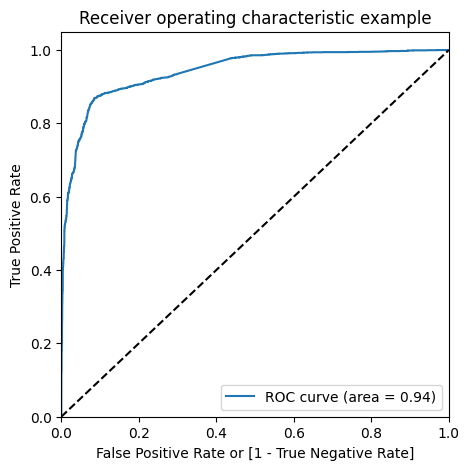

In [255]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve's area under the curve (AUC) is close to 1, indicating a strong predictive model. Specifically, we have obtained a high AUC value of 0.95, which further validates the effectiveness of our model.

In [256]:
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(
        lambda x: 1 if x > i else 0
    )
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0


In [258]:

cutoff_df = pd.DataFrame(columns=["prob", "accuracy", "sensi", "speci"])
from sklearn.metrics import confusion_matrix


num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
(cutoff_df)

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.705937,0.980535,0.536732
0.2,0.2,0.833797,0.907948,0.788106
0.3,0.3,0.887755,0.880373,0.892304
0.4,0.4,0.896568,0.860908,0.918541
0.5,0.5,0.893476,0.833739,0.930285
0.6,0.6,0.884663,0.790754,0.942529
0.7,0.7,0.873377,0.733982,0.959270
0.8,0.8,0.841064,0.615572,0.980010
0.9,0.9,0.811224,0.519059,0.991254


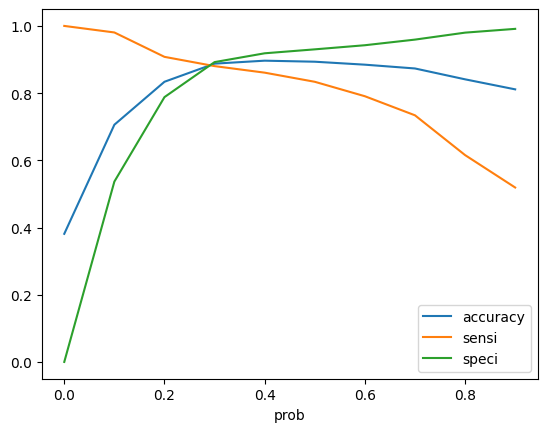

In [259]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])
plt.show()

After computing the sensitivity and specificity across different probability thresholds, it's evident that selecting 0.4 as the cutoff probability yields the optimal balance. The range between 0.3 and 0.4 is still too low, while the range from 0.4 to 0.45 emerges as the preferred choice for cutoff due to its improved performance.

In [260]:
y_train_pred_final["final_Predicted"] = y_train_pred_final.Converted_prob.map(
    lambda x: 1 if x > 0.4 else 0
)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [261]:
y_train_pred_final["Lead_Score"] = y_train_pred_final.Converted_prob.map(
    lambda x: round(x * 100)
)

y_train_pred_final[
    ["Converted", "Converted_prob", "Prospect ID", "final_Predicted", "Lead_Score"]
].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.001306,1871,0,0
1,0,0.314681,6795,0,31
2,0,0.001599,3516,0,0
3,0,0.162413,8105,0,16
4,0,0.153545,3934,0,15


In [262]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8965677179962894

In [263]:
confusion2 = metrics.confusion_matrix(
    y_train_pred_final.Converted, y_train_pred_final.final_Predicted
)
confusion2

array([[3676,  326],
       [ 343, 2123]], dtype=int64)

In [264]:
TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

In [265]:
TP / float(TP + FN)

0.8609083536090836

In [266]:
TN / float(TN + FP)

0.9185407296351824

Observation:

As observed above, the model demonstrates strong performance metrics. The ROC curve, with a value of 0.94, reflects excellent discriminatory power. For the Train Data, we have the following metrics:

- Accuracy: 89.6%
- Sensitivity: 86%
- Specificity: 91%

Additional statistics derived below provide insights into the False Positive Rate, Positive Predictive Value, Negative Predictive Value, Precision, and Recall.

In [267]:
print(FP / float(TN + FP))

0.0814592703648176


In [268]:
print(TP / float(TP + FP))

0.8668844426296447


In [269]:
confusion = metrics.confusion_matrix(
    y_train_pred_final.Converted, y_train_pred_final.final_Predicted
)
confusion

array([[3676,  326],
       [ 343, 2123]], dtype=int64)

In [270]:
TP / TP + FP

confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])

0.8668844426296447

In [271]:
TP / TP + FN

confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

0.8609083536090836

In [272]:
from sklearn.metrics import precision_score, recall_score

In [273]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8668844426296447

In [274]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8609083536090836

In [275]:
from sklearn.metrics import precision_recall_curve

In [276]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(
    y_train_pred_final.Converted, y_train_pred_final.Converted_prob
)

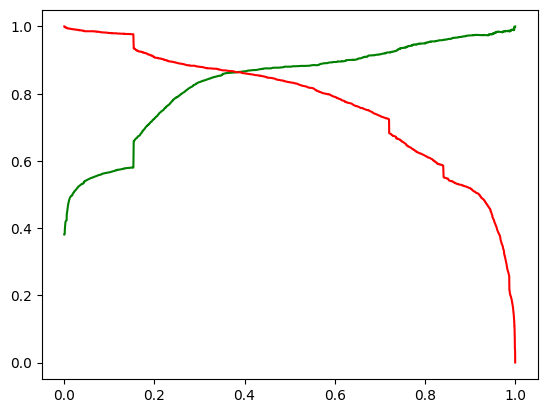

In [277]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [278]:
# the cutoff is 0.42 from above precision and recall chart, lets check accuracy at cutoff 0.42
y_train_pred_final["final_Predicted"] = y_train_pred_final.Converted_prob.map(
    lambda x: 1 if x > 0.42 else 0
)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0,0,16
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0,0,15


### THE LEAD SCORE 

In [279]:
y_train_pred_final["Lead_Score"] = y_train_pred_final.Converted_prob.map(
    lambda x: round(x * 100)
)

y_train_pred_final[
    ["Converted", "Converted_prob", "Prospect ID", "final_Predicted", "Lead_Score"]
].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.001306,1871,0,0
1,0,0.314681,6795,0,31
2,0,0.001599,3516,0,0
3,0,0.162413,8105,0,16
4,0,0.153545,3934,0,15


In [280]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8968769325912183

In [281]:
confusion2 = metrics.confusion_matrix(
    y_train_pred_final.Converted, y_train_pred_final.final_Predicted
)
confusion2

array([[3688,  314],
       [ 353, 2113]], dtype=int64)

In [282]:
TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

In [283]:
TP / float(TP + FN)

0.856853203568532

In [284]:
TN / float(TN + FP)

0.9215392303848076

In [285]:
TP / TP + FP

confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])

0.8668844426296447

In [286]:
TP / TP + FN

confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

0.8609083536090836

In [287]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8706221672847136

In [288]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.856853203568532

Predictions


In [289]:
x_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,8.0,1011,8.0,No,No,No,No,No,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0.0,0,0.0,No,No,No,No,No,0,1,...,0,0,0,0,0,0,1,0,0,0
7766,5.0,59,5.0,No,No,No,No,No,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0.0,0,0.0,No,No,No,No,No,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0.0,0,0.0,No,No,No,No,No,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,15.0,290,1.5,No,No,No,No,No,1,0,...,0,0,0,0,1,0,0,0,0,0
2152,0.0,0,0.0,No,No,No,No,No,0,1,...,0,0,0,0,0,0,1,0,0,0
7101,0.0,0,0.0,No,No,No,No,No,0,0,...,0,0,0,0,0,0,0,0,0,0
5331,3.0,1608,3.0,No,No,No,No,No,1,0,...,0,0,1,0,0,0,0,0,0,0


In [290]:
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

x_test[num_cols] = scaler.transform(x_test[num_cols])

x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0.857967,0.964504,2.613424,No,No,No,No,No,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-0.656434,-0.885371,-1.085519,No,No,No,No,No,0,1,...,0,0,0,0,0,0,1,0,0,0
7766,0.290067,-0.777416,1.226321,No,No,No,No,No,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,-0.656434,-0.885371,-1.085519,No,No,No,No,No,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.656434,-0.885371,-1.085519,No,No,No,No,No,0,1,...,0,0,0,0,0,0,0,0,0,0


In [291]:
x_test = x_test[rfe_cols]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,0,0,0,0,1,0,0,0,1
2376,-0.885371,1,0,0,0,0,0,0,1,0,0,0,1
7766,-0.777416,0,0,1,0,0,0,0,1,0,0,0,0
9199,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,1,0,0,0,0


In [292]:
x_test_sm = sm.add_constant(x_test[rfe_cols])

### Predictions on test set

In [293]:
y_test_pred = res.predict(x_test_sm)

In [294]:
y_test_pred[:10]

4269    0.946551
2376    0.986803
7766    0.757232
9199    0.005547
4359    0.840424
9186    0.892177
1631    0.555962
8963    0.232193
8007    0.259027
5324    0.777505
dtype: float64

In [295]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [296]:
y_pred_1.head()

,0
4269,0.946551
2376,0.986803
7766,0.757232
9199,0.005547
4359,0.840424


In [297]:
y_test_df = pd.DataFrame(y_test)

In [298]:
y_test_df["Prospect ID"] = y_test_df.index

In [299]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [300]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [301]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.946551
1,1,2376,0.986803
2,1,7766,0.757232
3,0,9199,0.005547
4,1,4359,0.840424


In [302]:
y_pred_final = y_pred_final.rename(columns={0: "Converted_prob"})

In [303]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.946551
1,1,2376,0.986803
2,1,7766,0.757232
3,0,9199,0.005547
4,1,4359,0.840424


In [304]:
y_pred_final = y_pred_final[["Prospect ID", "Converted", "Converted_prob"]]
y_pred_final["Lead_Score"] = y_pred_final.Converted_prob.map(lambda x: round(x * 100))

In [305]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.946551,95
1,2376,1,0.986803,99
2,7766,1,0.757232,76
3,9199,0,0.005547,1
4,4359,1,0.840424,84


In [306]:
y_pred_final["final_Predicted"] = y_pred_final.Converted_prob.map(
    lambda x: 1 if x > 0.42 else 0
)

In [307]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.946551,95,1
1,2376,1,0.986803,99,1
2,7766,1,0.757232,76,1
3,9199,0,0.005547,1,0
4,4359,1,0.840424,84,1


In [309]:
sum(y_pred_final["Converted"]) / len(leads_data["Converted"])*100

11.85064935064935

In [310]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8964646464646465

In [311]:
confusion2 = metrics.confusion_matrix(
    y_pred_final.Converted, y_pred_final.final_Predicted
)
confusion2

array([[1533,  144],
       [ 143,  952]], dtype=int64)

In [312]:
TP / float(TP + FN)

0.856853203568532

In [313]:
TN / float(TN + FP)

0.9215392303848076

In [314]:
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8686131386861314

In [315]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.869406392694064

In [316]:
TP / TP + FP
confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])

0.8668844426296447

In [317]:
TP / TP + FN

confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

0.8609083536090836

### 1. Comparison of Train and Test Data:

**Train Data:**
- Accuracy: 89.6%
- Sensitivity: 85%
- Specificity: 92%
- Precision: 86%
- Recall: 86%
- Precision Score: 87%
- Recall Score: 85%

**Test Data:**
- Accuracy: 89.6%
- Sensitivity: 85%
- Specificity: 92%
- Precision: 78%
- Recall: 86%
- Recall Score: 86.9
- Precision Score: 86.6

The model demonstrates robust performance in predicting the Conversion Rate, instilling confidence in decision-making for the CEO.

The optimal probability threshold/cutoff is determined to be 0.42, which yields the best results.

Key influential factors for conversion include:
- Last Notable Activity_SMS Sent
- Tags_Will revert after reading the email
- Lead Origin_Lead Add Form
- Tags_Closed by Horizzon
- What is your current occupation_Working Professional
- Tags_Ringing
- Total Time Spent on Website
- Do Not Email_Yes
- Tags_switched off
- Tags_Busy
- Tags_Lost to EINS
- Tags_in touch with EINS
- Last Notable Activity_Had a Phone Conversation

With these factors in mind, X_Education can anticipate significant potential in converting leads, particularly among working professionals, thereby fostering the growth of the education sector.

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85.
They can be termed as 'Hot Leads'.

In [318]:
hot_leads = y_pred_final[y_pred_final["Lead_Score"] >= 80]

In [319]:
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.946551,95,1
1,2376,1,0.986803,99,1
4,4359,1,0.840424,84,1
5,9186,1,0.892177,89,1
12,2935,1,0.967708,97,1
...,...,...,...,...,...
2745,7273,1,0.839320,84,1
2756,3820,1,0.995405,100,1
2766,3118,0,0.935120,94,1
2768,2152,1,0.986803,99,1
